<a href="https://colab.research.google.com/github/anubhavgupta1/Dive-Into-Deep-Learning/blob/main/Linear%20Regression/Implementation%20from%20Scratch/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
!pip install d2l==0.16.1

     |████████████████████████████████| 81kB 5.1MB/s 


In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

### Generating the Dataset

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    print("Features shape is : ", X.shape)
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    y = y.reshape((-1, 1))
    print("Labels shape is : ", y.shape)
    return X, y

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

Features shape is :  torch.Size([1000, 2])
Labels shape is :  torch.Size([1000, 1])


In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.6659, -0.9956]) 
label: tensor([10.9129])


In [6]:
features[:, (1)].shape

torch.Size([1000])

### Plot The data

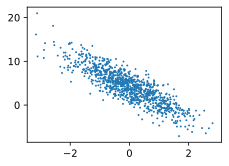

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),labels.detach().numpy(), 1)

### Reading the Dataset

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.9488,  0.5963],
        [-1.3560, -0.2244],
        [ 0.3922,  1.1737],
        [-0.0035, -0.9949],
        [-1.8266,  1.6045],
        [-1.3803, -1.9014],
        [ 0.1831, -0.1262],
        [-0.1894,  1.6662],
        [-0.2885, -0.9377],
        [-1.6117, -2.0726]]) 
 tensor([[-1.7159],
        [ 2.2601],
        [ 1.0023],
        [ 7.5507],
        [-4.9098],
        [ 7.8978],
        [ 4.9979],
        [-1.8105],
        [ 6.8154],
        [ 8.0280]])


###Initializing Model Parameters

In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### Defining the Model

In [11]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

### Defining the Loss Function

In [12]:
def squared_loss(y_hat, y):  #@save
    y = y.reshape(y_hat.shape)
    """Squared loss."""
    return (y_hat - y)**2 / 2

###Defining the Optimization Algorithm

In [13]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Training

In [14]:
lr = 0.03
num_epochs = 50
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        if(epoch==0 or epoch%10==9):
          print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.040836
epoch 10, loss 0.000051
epoch 20, loss 0.000051
epoch 30, loss 0.000051
epoch 40, loss 0.000051
epoch 50, loss 0.000051


In [15]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 2.4998e-04, -6.1035e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0002], grad_fn=<RsubBackward1>)
